# Uber Drives Data Analysis

Welcome to my Python Notebook focused on Uber Data Analysis. In this notebook, I'll explore techniques and tools to gain insights from Uber Drives Dataset, which will enable us to make informed decisions and drive business growth.

## Introduction

Uber, a popular ride-sharing platform, generates vast amounts of data every day. This data contains valuable information about ride requests, trip durations, pickup and drop-off locations, driver-partner details, and more. By analyzing this data, we can extract meaningful insights to optimize operations, improve customer experiences, and make data-driven decisions.

In this notebook, we will cover essential steps and techniques involved in Uber Data Analysis, such as  
- **Data Preparation**
- **Exploratory data analysis (EDA),**
- **Visualization**

We will utilize popular Python libraries, including pandas, numpy, matplotlib & seaborn to perform our analysis efficiently and effectively.

Throughout this notebook, we encourage you to experiment, modify the code, and adapt it to your specific dataset and analysis goals. Let's dive into the exciting world of Uber Data analysis and unlock valuable insights from our data!

In [1]:
# Library imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/uberdrives/My Uber Drives - 2016.csv", sep=',')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


**From the sneak peek of our dataset, we can see that we have**
- Start Date along with Time of Pickup
- End Date along with Time of Drop-Off
- Start Location
- End Location
- Category
- Miles Travelled
- Reason of Transportation

In [3]:
df = df.drop(df.index[-1])

# Data Preparation
Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. Key steps include collecting, cleaning, and labeling raw data into a form suitable for machine learning (ML) algorithms and then exploring and visualizing the data. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df[['Start_Date', 'Start_Time']] = df['START_DATE*'].str.split(' ', n=1, expand=True)
df[['End_Date', 'End_Time']] = df['END_DATE*'].str.split(' ', n=1, expand=True)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Date,Start_Time,End_Date,End_Time
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49


**We extract the Start_Date and End_Date with their respective Time for further analysis**.

In [6]:
df = df.drop(['START_DATE*', 'END_DATE*'], axis=1)

**Previous columns can be dropped as we have more efficient columns.**

In [7]:
df.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Date,Start_Time,End_Date,End_Time
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,21:11,1/1/2016,21:17
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1:25,1/2/2016,1:37
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,20:25,1/2/2016,20:38
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,17:31,1/5/2016,17:45
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,14:42,1/6/2016,15:49


**Rearranging the Dataset**

In [8]:
df = df.iloc[:,[5, 6, 7, 8, 0, 1, 2, 3, 4]]
df.head()

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Let's Extract the Month from the Dates for more effective Analysis**

In [9]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce')
df['Month'] = df['Start_Date'].dt.strftime('%B')
df.sample(5)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month
1000,2016-11-26,17:00,2016-11-26,17:12,Business,Cary,Apex,5.1,Meeting,November
618,2016-08-01,16:29,2016-08-01,16:59,Business,Cary,Morrisville,9.1,NaN,August
629,2016-08-05,19:17,2016-08-05,19:27,Business,Columbia Heights,Kalorama Triangle,1.5,NaN,August
791,2016-10-07,10:56,2016-10-07,10:59,Business,Unknown Location,Lahore,33.2,NaN,October
34,2016-01-20,10:36,2016-01-20,11:11,Business,Cary,Raleigh,17.1,Meeting,January


**Adding a new feature caleld "Travelling Time"**

In [10]:
df['Travelling_Time'] = ((pd.to_datetime(df['End_Time'], format='%H:%M')) - (pd.to_datetime(df['Start_Time'], format='%H:%M'))).dt.total_seconds() / 60

df.loc[df['Travelling_Time'] < 0, 'Travelling_Time'] += 24 * 60

df.sample(5)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Travelling_Time
945,2016-11-12,13:46,2016-11-12,13:50,Business,Central,West Berkeley,0.6,NaN,November,4.0
183,2016-03-04,7:47,2016-03-04,8:06,Business,Cary,Durham,9.9,Meeting,March,19.0
418,2016-06-08,14:31,2016-06-08,14:37,Business,Medical Centre,Tudor City,0.7,Errand/Supplies,June,6.0
353,2016-05-04,21:30,2016-05-04,21:36,Business,Capitol One,University District,4.5,Meal/Entertain,May,6.0
639,2016-08-08,21:50,2016-08-08,22:15,Business,Cary,Morrisville,4.8,NaN,August,25.0


**Renaming each feature for proper Identification**

In [11]:
dict = {'CATEGORY*': 'Category',
        'START*': 'Start_Location',
        'STOP*': 'Stop_Location',
        'MILES*': 'Distance',
        'PURPOSE*': 'Purpose'
       }
df.rename(columns=dict,
          inplace=True)
df.head()

,Start_Date,Start_Time,End_Date,End_Time,Category,Start_Location,Stop_Location,Distance,Purpose,Month,Travelling_Time
0,2016-01-01,21:11,2016-01-01,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,6.0
1,2016-01-02,1:25,2016-01-02,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,January,12.0
2,2016-01-02,20:25,2016-01-02,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,13.0
3,2016-01-05,17:31,2016-01-05,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,14.0
4,2016-01-06,14:42,2016-01-06,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,67.0


**Now Let's move on and check if any of our features contains Null Values, we wouldn't want Null values to affect our Analysis**

In [12]:
print("Checking Null Values in Category : ", df.Category.isna().any())
print("Checking Null Values in Purpose : ", df.Purpose.isna().any())
print("Checking Null Values in Start_Location : ", df.Start_Location.isna().any())
print("Checking Null Values in Stop_Location : ", df.Stop_Location.isna().any())
print("Checking Null Values in Distance : ", df.Distance.isna().any())

Checking Null Values in Category :  False
Checking Null Values in Purpose :  True
Checking Null Values in Start_Location :  False
Checking Null Values in Stop_Location :  False
Checking Null Values in Distance :  False


In [13]:
# Changing nan values in "Purpose" to "Others"

df['Purpose'] = df['Purpose'].replace(np.nan, "Others")
df.Purpose.isna().any()

False

**So we are almost ready with our prepared data for Analysis**

# Exploratory Data Analysis (EDA)

In [14]:
df.sample(10)

,Start_Date,Start_Time,End_Date,End_Time,Category,Start_Location,Stop_Location,Distance,Purpose,Month,Travelling_Time
488,2016-06-27,21:09,2016-06-27,21:19,Business,Jamestown Court,Jamestown Court,1.0,Others,June,10.0
456,2016-06-19,5:51,2016-06-19,6:00,Business,Raleigh,Cary,5.9,Others,June,9.0
260,2016-03-21,20:18,2016-03-21,20:55,Business,Sharpstown,Midtown,25.6,Meal/Entertain,March,37.0
381,2016-05-23,20:19,2016-05-23,20:27,Business,Whitebridge,Savon Height,3.6,Meal/Entertain,May,8.0
109,2016-02-16,8:29,2016-02-16,9:34,Business,Unknown Location,Colombo,14.1,Others,February,65.0
386,2016-05-28,0:15,2016-05-28,0:21,Business,Kilarney Woods,Whitebridge,4.7,Errand/Supplies,May,6.0
1032,2016-12-09,12:09,2016-12-09,12:24,Business,Cary,Apex,5.1,Errand/Supplies,December,15.0
1078,2016-12-20,18:47,2016-12-20,19:21,Business,Islamabad,Unknown Location,10.3,Customer Visit,December,34.0
1008,2016-11-30,12:43,2016-11-30,12:53,Business,Morrisville,Cary,3.1,Others,November,10.0
474,2016-06-26,17:43,2016-06-26,18:18,Business,New Orleans,Kenner,12.6,Meeting,June,35.0


### **Let's kick off with the most busiest month of the year 2016**







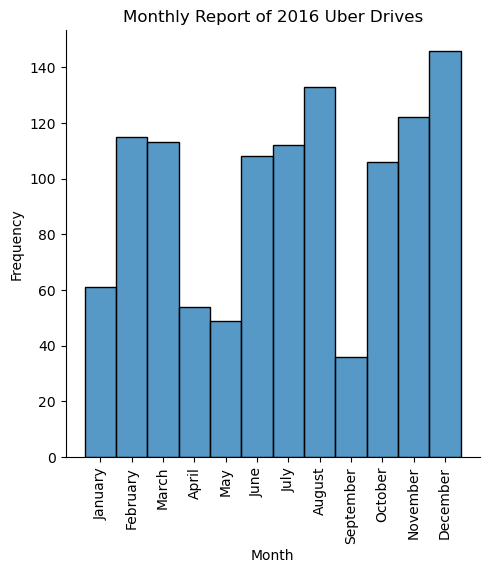

In [15]:
sns.displot(df['Month'])
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.title("Monthly Report of 2016 Uber Drives")
plt.show()

**INSIGHTS :** We can clearly see that December was the most busiest month followed by August and November 

### **Let's dive an Analyse the Month of December as it the most active month in the year 2016**

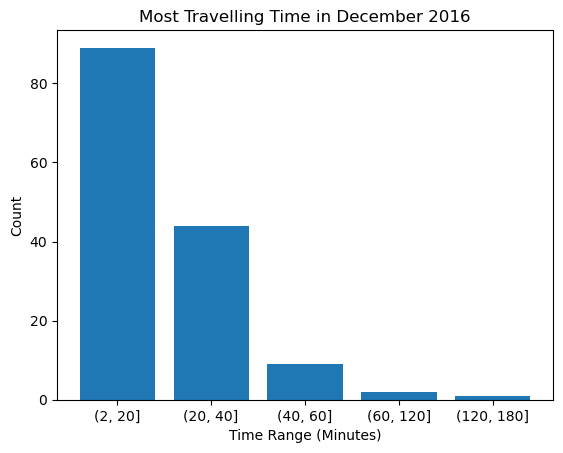

In [16]:
Travelling_Time_Dec = df[df['Month'] == "December"]['Travelling_Time']
Travelling_Time_Dec = pd.cut(Travelling_Time_Dec, bins = [2, 20, 40, 60, 120, 180])

Travelling_Time_Dec = Travelling_Time_Dec.value_counts().sort_index()
plt.bar(Travelling_Time_Dec.index.astype(str), Travelling_Time_Dec.values)

plt.xlabel('Time Range (Minutes)')
plt.ylabel('Count')
plt.title('Most Travelling Time in December 2016')
plt.show()

**INSIGHTS :** We cen clearly get an insight from the above bar plot that maximum Uber Rides lasted between 2 to 20 minutes in the month of December 2016.

### **Now let's plot and see the overall distances covered by User Drivers throughout the year.**

Text(0.5, 1.0, 'Overall Distance Covered by Uber Drives')

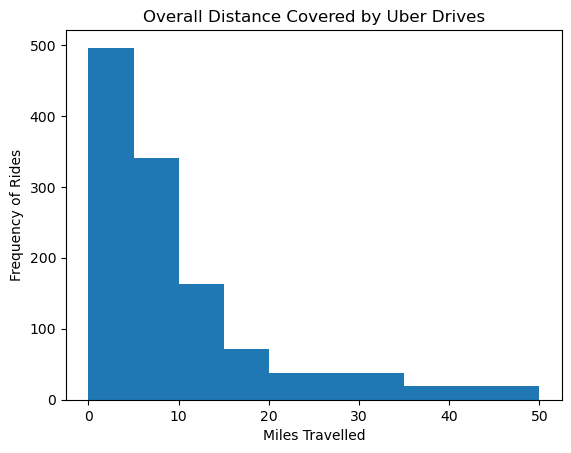

In [17]:
df.Distance.plot(kind='hist', bins = [0,5,10,15,20,35,50])
plt.xlabel("Miles Travelled")
plt.ylabel("Frequency of Rides")
plt.title("Overall Distance Covered by Uber Drives")

**INSIGHTS :** This gives us a clear idea that there were more than 450+ rides that covered 0 to 5 Miles and over 300 rides that covered 5 to 15 miles of journey throughout the year.

### **Let's analyse the Longest the Distances.**





In [18]:
maxtraffic = df.Travelling_Time.max()
maxtrafficdf = df.loc[df.Travelling_Time == maxtraffic]
maxtrafficdf

,Start_Date,Start_Time,End_Date,End_Time,Category,Start_Location,Stop_Location,Distance,Purpose,Month,Travelling_Time
776,2016-09-27,21:01,2016-09-28,2:37,Business,Unknown Location,Unknown Location,195.6,Others,September,336.0


We can see that the location is unknown, so let's clear all those unknown locations from our df and then find the maximum distance accordingly.

In [19]:
df_dist = df.copy()

for x in range(len(df.Start_Location)):
    if (df.loc[x].Start_Location == 'Unknown Location') or (df.loc[x].Stop_Location == 'Unknown Location'):
        df_dist = df.drop(x)

In [20]:
maxtraffic = df_dist.Travelling_Time.max()
maxtrafficdf = df_dist.loc[df_dist.Travelling_Time == maxtraffic]
maxtrafficdf

,Start_Date,Start_Time,End_Date,End_Time,Category,Start_Location,Stop_Location,Distance,Purpose,Month,Travelling_Time
776,2016-09-27,21:01,2016-09-28,2:37,Business,Unknown Location,Unknown Location,195.6,Others,September,336.0


 **So, we can see that the Longest distance is between Latta and Jacksonville**
 
 
 
### **Moving on, let's visualize top 10 longest distances.**
 
 
 
 
 
 

In [21]:
longest_10 = df_dist.nlargest(10, 'Distance')
longest_10

,Start_Date,Start_Time,End_Date,End_Time,Category,Start_Location,Stop_Location,Distance,Purpose,Month,Travelling_Time
269,2016-03-25,16:52,2016-03-25,22:22,Business,Latta,Jacksonville,310.3,Customer Visit,March,330.0
270,2016-03-25,22:54,2016-03-26,1:39,Business,Jacksonville,Kissimmee,201.0,Meeting,March,165.0
881,2016-10-30,15:22,2016-10-30,18:23,Business,Asheville,Mebane,195.9,Others,October,181.0
776,2016-09-27,21:01,2016-09-28,2:37,Business,Unknown Location,Unknown Location,195.6,Others,September,336.0
546,2016-07-14,16:39,2016-07-14,20:05,Business,Morrisville,Banner Elk,195.3,Others,July,206.0
559,2016-07-17,12:20,2016-07-17,15:25,Personal,Boone,Cary,180.2,Commute,July,185.0
297,2016-04-02,19:38,2016-04-02,22:36,Business,Jacksonville,Ridgeland,174.2,Customer Visit,April,178.0
299,2016-04-03,2:00,2016-04-03,4:16,Business,Florence,Cary,159.3,Meeting,April,136.0
727,2016-08-27,16:15,2016-08-27,19:13,Business,Unknown Location,Unknown Location,156.9,Others,August,178.0
268,2016-03-25,13:24,2016-03-25,16:22,Business,Cary,Latta,144.0,Customer Visit,March,178.0


In [22]:
Start = longest_10.Start_Location[:10].tolist()
Stop = longest_10.Stop_Location[:10].tolist()
labels = list(zip(Start, Stop))
labels

[('Latta', 'Jacksonville'),
 ('Jacksonville', 'Kissimmee'),
 ('Asheville', 'Mebane'),
 ('Unknown Location', 'Unknown Location'),
 ('Morrisville', 'Banner Elk'),
 ('Boone', 'Cary'),
 ('Jacksonville', 'Ridgeland'),
 ('Florence', 'Cary'),
 ('Unknown Location', 'Unknown Location'),
 ('Cary', 'Latta')]

Text(0.5, 1.0, 'Top 10 Longest Distances')

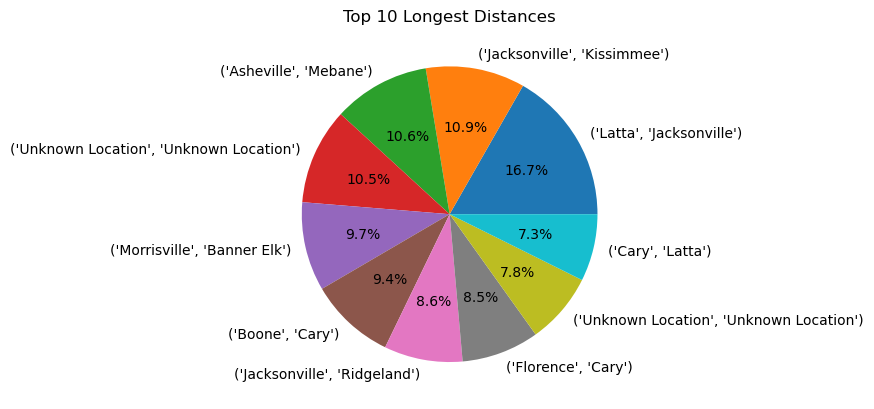

In [23]:
distances = df_dist.Distance.round().unique().tolist()
distances.sort(reverse=True)
plt.pie(distances[:10], labels=labels, autopct='%1.1f%%');
plt.title("Top 10 Longest Distances")

#### Insights:
- We can see from the above pie chart that **('Latta' to 'Jacksonville')** has maximum distance among all of the maximum distances followed by **('Jacksonville' to 'Kissimmee')** & **('Asheville' to 'Mebane')**.
- Also **('Asheville' to 'Mebane')**, **('Morrisville' to 'Banner Elk')** has almost similar distance


### **Similarly plotting 5 Shortest Distances**

In [24]:
shortest_5 = df_dist.nsmallest(5, 'Distance')
shortest_5

,Start_Date,Start_Time,End_Date,End_Time,Category,Start_Location,Stop_Location,Distance,Purpose,Month,Travelling_Time
44,2016-01-26,17:27,2016-01-26,17:29,Business,Cary,Cary,0.5,Errand/Supplies,January,2.0
120,2016-02-17,16:38,2016-02-17,16:43,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,February,5.0
420,2016-06-08,17:16,2016-06-08,17:18,Business,Soho,Tribeca,0.5,Errand/Supplies,June,2.0
516,2016-07-05,16:48,2016-07-05,16:52,Business,Whitebridge,Whitebridge,0.6,Errand/Supplies,July,4.0
945,2016-11-12,13:46,2016-11-12,13:50,Business,Central,West Berkeley,0.6,Others,November,4.0


In [25]:
Start = shortest_5.Start_Location[:5].tolist()
Stop = shortest_5.Stop_Location[:5].tolist()
labels = list(zip(Start, Stop))
labels

[('Cary', 'Cary'),
 ('Katunayaka', 'Katunayaka'),
 ('Soho', 'Tribeca'),
 ('Whitebridge', 'Whitebridge'),
 ('Central', 'West Berkeley')]

Text(0.5, 1.0, 'Top 5 Shortest Distances')

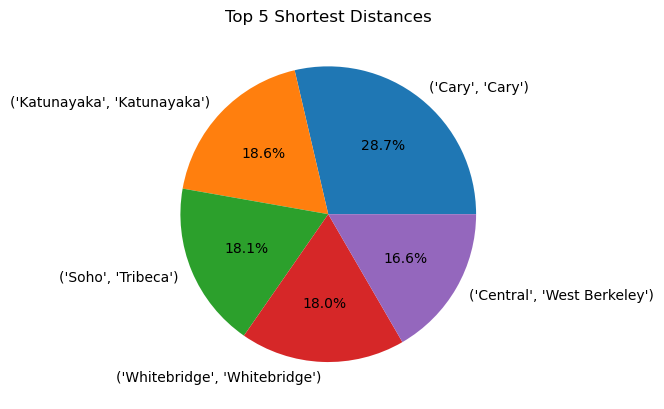

In [26]:
distances = df_dist.Distance.round().unique().tolist()
distances.sort(reverse=True)
plt.pie(distances[:5], labels=labels, autopct='%1.1f%%');
plt.title("Top 5 Shortest Distances")

#### Insights:
- We can see from the above pie chart that **Cary i.e in the same town** has minimum distance among all of the minimum distances followed by **Katunayaka** & **('Soho to Tribeca)**.

### **Analysis of Different Visited Places**

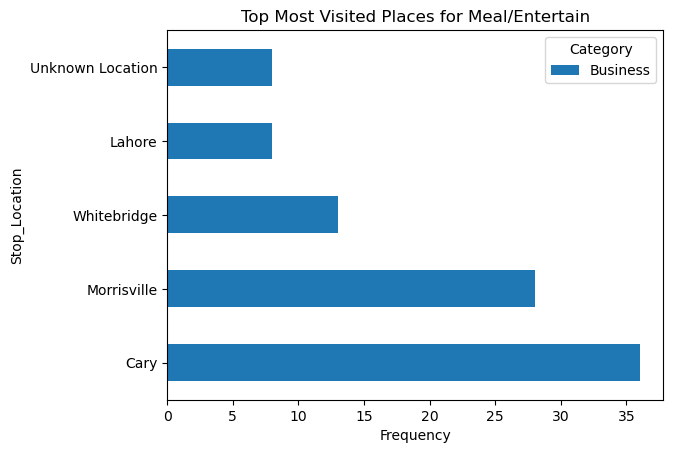

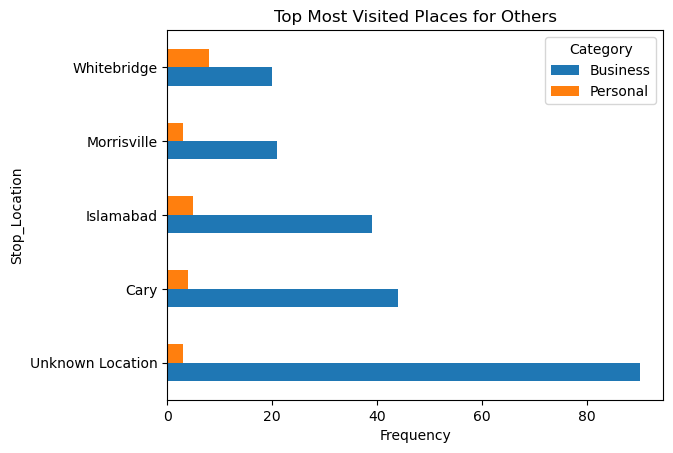

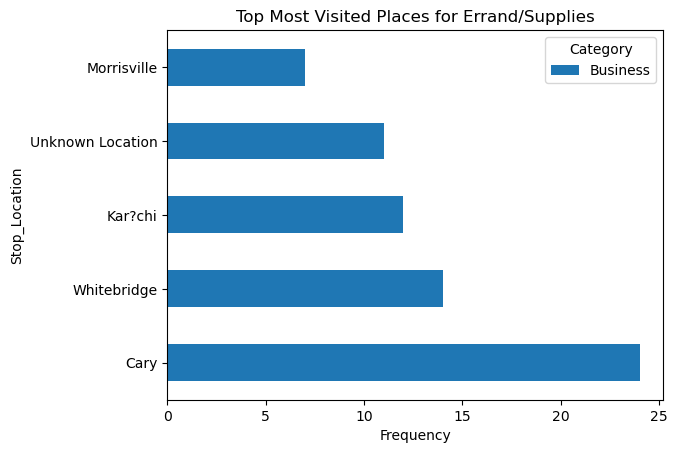

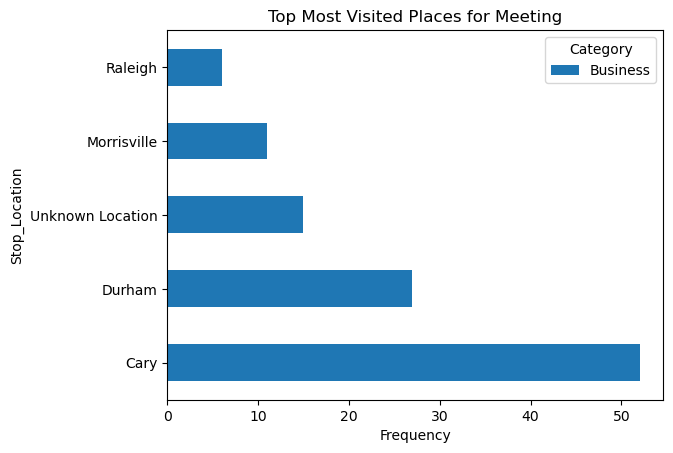

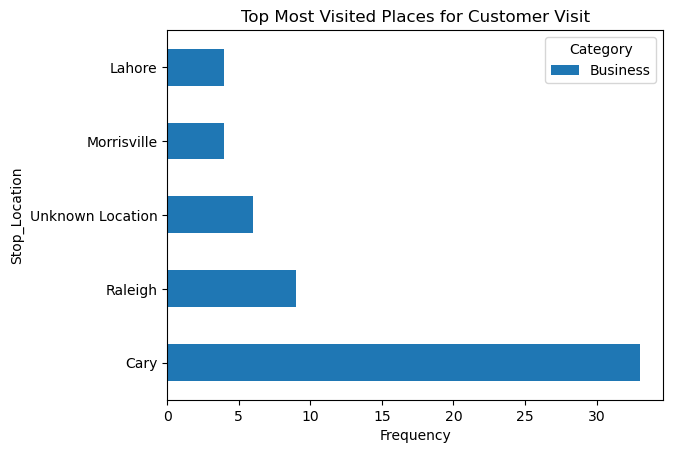

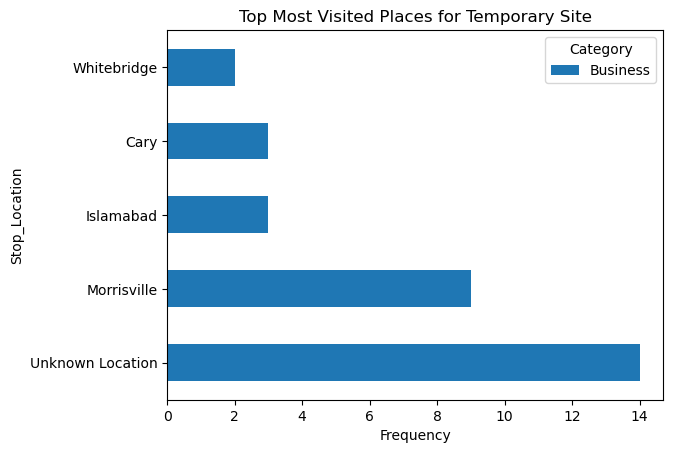

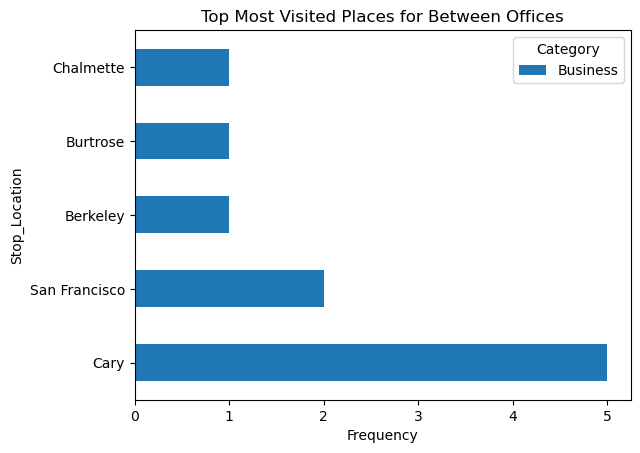

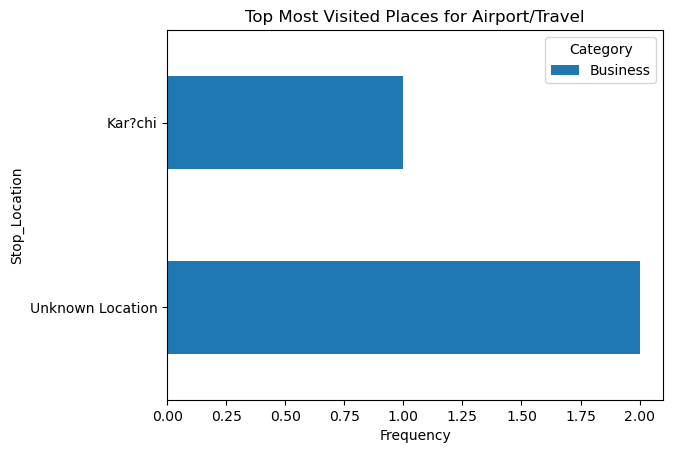

In [27]:
Purposes = df.Purpose.unique().tolist()
Purposes = [x for x in Purposes if x not in ['Charity ($)', 'Moving', 'Commute']]

for purpose in range(len(Purposes)):
    locationData = df[df["Purpose"] == Purposes[purpose]]
    locationData = locationData.groupby('Stop_Location')['Category'].value_counts().unstack()
    locationData = locationData.sort_values(by='Business', ascending=False).head(5)
    locationData.plot(kind='barh')
    plt.xlabel("Frequency")
    plt.title(f"Top Most Visited Places for {Purposes[purpose]}")
    plt.show()

**Valuable Insights :**
- For **Meal/Entertain** the most visited place was **Cary** followed by **Morrisville** & **WhiteBridge**
- Similarly for different **Errand/Supplies**, the most visited place was **Cary** followed by **Whitebridge** & **Karchi** 
- For **Meeting**, **Customer visit**, **Between Officess**, **Cary** was the most visited place.
- **Airport** was present in an Karchi.

### **Visualising number of Travels for different Purposes**





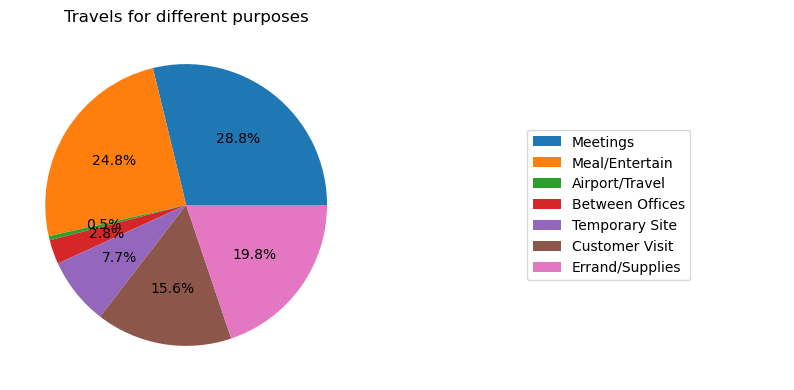

In [28]:
meets = len(df[df.Purpose == 'Meeting'].value_counts())
meal = len(df[df.Purpose == 'Meal/Entertain'].value_counts())
airport = len(df[df.Purpose == 'Airport/Travel'].value_counts())
offices = len(df[df.Purpose == 'Between Offices'].value_counts())
temp_site = len(df[df.Purpose == 'Temporary Site'].value_counts())
cust_visit = len(df[df.Purpose == 'Customer Visit'].value_counts())
errand = len(df[df.Purpose == 'Errand/Supplies'].value_counts())

purposes = {'Meetings' : meets, 'Meal/Entertain': meal, 'Airport/Travel': airport,'Between Offices': offices,'Temporary Site': temp_site,'Customer Visit': cust_visit,'Errand/Supplies': errand}

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(221) 
ax.set_title('Travels for different purposes')
ax.axis("equal")
pie = ax.pie(purposes.values(), startangle=0, autopct='%1.1f%%')
ax2 = fig.add_subplot(222)
ax2.axis("off") 
ax2.legend(pie[0],purposes.keys(), loc="center")
plt.show()

**INSIGHTS :**
- This gives us the idea that among all the travels by Uber in 2016, most of them are for Meetings
- The next most frequent travels are for Meal/Entertain and Errand/Supplies respecrtively.

**As of now we have only 2 numerical values, i.e Distance and Time-Travelled.**

### **Let's see the Correlations for the same.**

In [29]:
corr = df.corr(numeric_only=True)
corr

,Distance,Travelling_Time
Distance,1.000000,0.842262
Travelling_Time,0.842262,1.000000


Plotting the `heatmap()`

<Axes: >

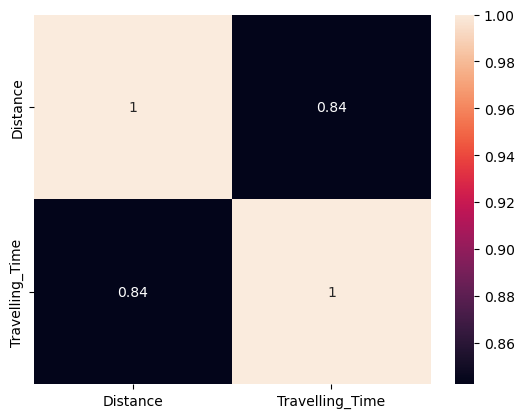

In [30]:
sns.heatmap(corr, annot=True,)

#### Similarly we can also plot the pairwise plot of the numeric values, i.e Travelling_Time & Distance

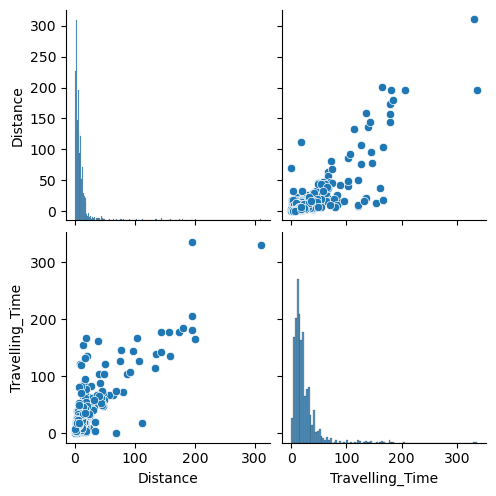

In [31]:
sns.pairplot(df)

# Thank You
### Show some love with an Upvote :)